<a href="https://colab.research.google.com/github/MRSaputra06/Tugas-Data-Science-M.Ramadhani-Saputra/blob/main/Tugas%20Explanatory%20Data%20Analysis%20(EDA)%20_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('passing-grade.csv')
df.head()

,NO,PTN,KODE PRODI,NAMA PRODI,RATAAN,S.BAKU,MIN,MAX
0,1,UNIVERSITAS INDONESIA,3211015,PENDIDIKAN DOKTER,747.93,19.63,724.38,798.55
1,2,UNIVERSITAS AIRLANGGA,3811014,PENDIDIKAN DOKTER,726.94,21.29,702.54,808.01
2,3,UNIVERSITAS PADJADJARAN,3331013,PENDIDIKAN DOKTER,717.94,18.69,694.17,780.52
3,4,UNIVERSITAS GADJAH MADA,3611066,KEDOKTERAN,725.21,27.08,689.05,809.84
4,5,UNIVERSITAS INDONESIA,3211166,ILMU KOMPUTER,712.41,24.13,685.96,798.66


-> Dataset ini memuat informasi nilai passing grade dari berbagai program studi di Perguruan Tinggi Negeri (PTN) di Indonesia.
-> Program Studi Kedokteran memiliki nilai rata-rata lebih tinggi dibanding prodi lain (seperti Ilmu Komputer).
Rentang nilai masuk dan simpangan baku memberikan informasi penting tentang ketatnya seleksi:
  ) Simpangan baku kecil > seleksi ketat dan nilai kandidat seragam.
  ) Simpangan besar > ada keragaman kemampuan, atau kuota lebih besar.
-> UI dan UGM memiliki prodi dengan nilai maksimum sangat tinggi, yang berarti persaingan ketat di top-tier universitas.

In [20]:
print(df.describe())

               NO    KODE PRODI      RATAAN      S.BAKU         MIN  \
count  500.000000  5.000000e+02  500.000000  500.000000  500.000000   
mean   250.500000  3.527288e+06  635.751620   16.275680  616.983280   
std    144.481833  9.562863e+05   27.816019    4.077003   25.623987   
min      1.000000  1.111165e+06  594.600000    7.130000  581.920000   
25%    125.750000  3.331131e+06  613.300000   13.125000  595.737500   
50%    250.500000  3.551209e+06  630.175000   15.935000  612.705000   
75%    375.250000  3.721096e+06  653.270000   18.515000  632.800000   
max    500.000000  9.111126e+06  747.930000   29.580000  724.380000   

              MAX  
count  500.000000  
mean   687.493600  
std     38.340468  
min    621.270000  
25%    657.397500  
50%    681.480000  
75%    712.077500  
max    809.840000  


-> Sebagian besar prodi memiliki nilai rata-rata antara 613 hingga 653, dengan hanya sebagian kecil yang memiliki nilai ekstrem tinggi (di atas 700). Prodi dengan nilai >700 sangat kompetitif dan bisa jadi termasuk prodi favorit seperti Kedokteran atau Teknik.
-> Semakin kecil nilai simpangan baku, semakin homogen peserta yang diterima (seleksi ketat dan nilai mendekati rata-rata). Prodi dengan simpangan baku tinggi mungkin menerima mahasiswa dari rentang nilai lebih lebar (bisa karena kuota lebih besar atau seleksi lebih longgar).
-> Prodi dengan nilai maksimum tinggi >750 cenderung adalah prodi top-tier seperti Kedokteran, Teknik Informatika, atau Hukum di universitas unggulan. Rentang nilai (MAX - MIN) bisa digunakan untuk mengetahui seberapa ketat dan kompetitif seleksi tiap prodi.

In [21]:
print(df.isnull().sum())

NO            0
PTN           0
KODE PRODI    0
NAMA PRODI    0
RATAAN        0
S.BAKU        0
MIN           0
MAX           0
dtype: int64


-> Hasil diatas menunjukkan nilai 0 pada seluruh kolom, yang berarti data ini sangat baik untuk proses EDA, visualisasi dan modeling karena tidak memerlukan tahap proprocessing tambhan.

In [23]:
ptn_count = df['PTN'].value_counts()

<ipython-input-17-02fb3c77e96c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ptn_count.values[:10], y=ptn_count.index[:10], palette="viridis")


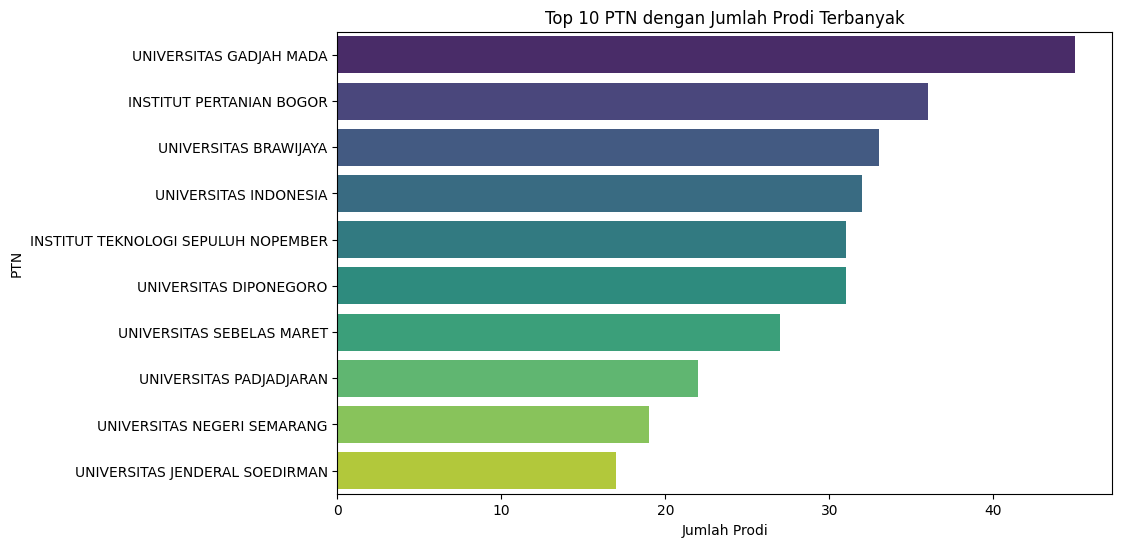

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ptn_count.values[:10], y=ptn_count.index[:10], palette="viridis")
plt.title("Top 10 PTN dengan Jumlah Prodi Terbanyak")
plt.xlabel("Jumlah Prodi")
plt.ylabel("PTN")
plt.show()

-> Berdasarkan visualisasi data jumlah program studi (prodi) per perguruan tinggi negeri (PTN), diketahui bahwa Universitas Gadjah Mada (UGM) memiliki jumlah prodi terbanyak, diikuti oleh Institut Pertanian Bogor (IPB), Universitas Brawijaya (UB), dan Universitas Indonesia (UI) dan seterusnya dengan yang paling bawah atau top ke-10 adalah UniversitasJendral Soedirman. Kesepuluh PTN yang ditampilkan merupakan institusi besar yang tersebar di berbagai wilayah Indonesia, mencerminkan peran sentral mereka dalam menyediakan akses pendidikan tinggi yang luas dan beragam. Banyaknya jumlah prodi di PTN tersebut juga mencerminkan komitmen terhadap diversifikasi bidang ilmu dan daya tampung yang besar untuk memenuhi kebutuhan pendidikan nasional.

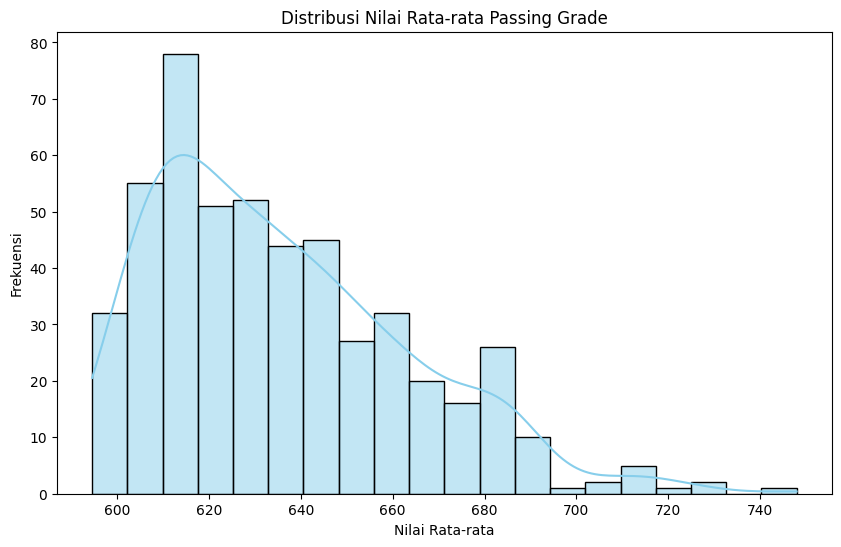

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df["RATAAN"], kde=True, bins=20, color="skyblue")
plt.title("Distribusi Nilai Rata-rata Passing Grade")
plt.xlabel("Nilai Rata-rata")
plt.ylabel("Frekuensi")
plt.show()

-> Distribusi nilai rata-rata passing grade menunjukkan kecenderungan distribusi yang miring ke kanan (right-skewed), dengan mayoritas nilai berkisar antara 600 hingga 680. Hal ini mengindikasikan bahwa sebagian besar peserta memiliki nilai rata-rata dalam rentang tersebut, sementara hanya sedikit peserta yang memiliki nilai di atas 700. Dengan demikian, nilai rata-rata passing grade cenderung menumpuk di rentang menengah ke bawah, menunjukkan bahwa tingkat kelulusan umumnya didominasi oleh nilai sedang, bukan nilai tinggi.

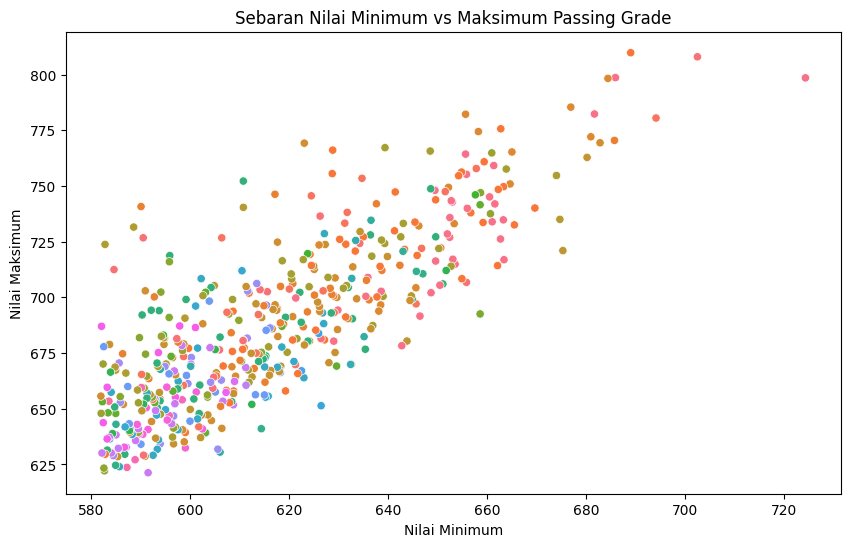

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MIN", y="MAX", hue="PTN", legend=False)
plt.title("Sebaran Nilai Minimum vs Maksimum Passing Grade")
plt.xlabel("Nilai Minimum")
plt.ylabel("Nilai Maksimum")
plt.show()

-> Terdapat pola hubungan linear positif yang jelas antara nilai minimum dan nilai maksimum passing grade. Artinya, program studi dengan nilai minimum tinggi cenderung juga memiliki nilai maksimum tinggi. Hal ini menunjukkan bahwa kualitas peserta yang diterima di program studi tersebut relatif merata dan konsisten tinggi, serta dapat diindikasikan bahwa persaingan masuk lebih ketat.

In [25]:
df['Kategori_Prodi'] = df['NAMA PRODI'].apply(lambda x: 'Kedokteran' if 'DOKTER' in x.upper() else 'Non-Kedokteran')

<ipython-input-26-6a942f0e912c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Kategori_Prodi', y='RATAAN', palette="pastel")


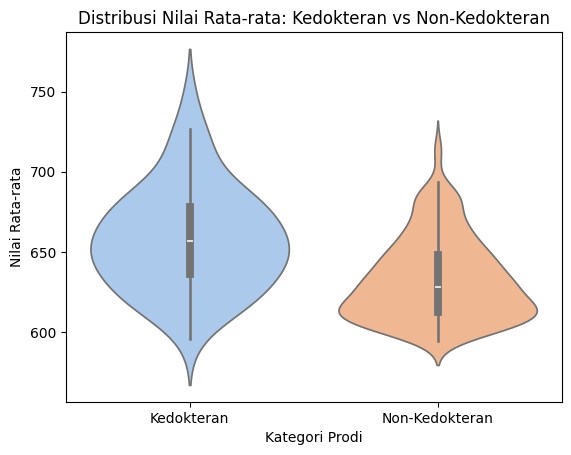

In [26]:
sns.violinplot(data=df, x='Kategori_Prodi', y='RATAAN', palette="pastel")
plt.title("Distribusi Nilai Rata-rata: Kedokteran vs Non-Kedokteran")
plt.xlabel("Kategori Prodi")
plt.ylabel("Nilai Rata-rata")
plt.show()

-> Program studi Kedokteran memiliki passing grade (nilai minimum dan rata-rata) yang secara signifikan lebih tinggi dibandingkan program studi Non-Kedokteran. Ini menunjukkan bahwa Kedokteran adalah salah satu program paling kompetitif dengan selektivitas tinggi, sebagaimana terlihat dari sebaran nilai minimum hingga maksimum serta distribusi nilai rata-ratanya.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

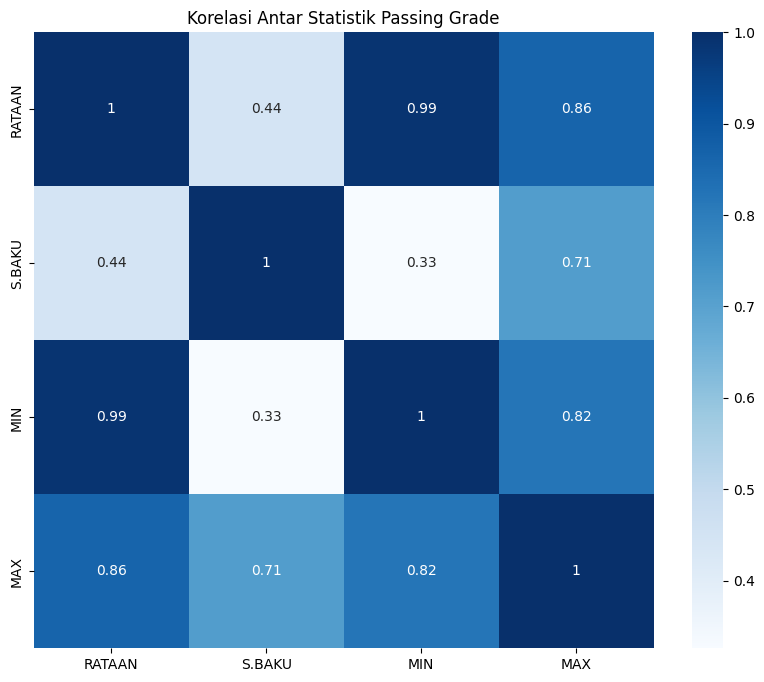

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['RATAAN', 'S.BAKU', 'MIN', 'MAX']].corr(), annot=True, cmap='Blues')
plt.title("Korelasi Antar Statistik Passing Grade")
plt.show()

-> Program studi kedokteran cenderung memiliki nilai rata-rata passing grade yang lebih tinggi dibandingkan program studi non-kedokteran, sebagaimana ditunjukkan oleh distribusi yang lebih condong ke nilai tinggi pada violin plot. Selain itu, dari heatmap korelasi, terlihat bahwa nilai rata-rata passing grade memiliki korelasi yang sangat kuat dengan nilai minimum (0.99) dan nilai maksimum (0.86), serta korelasi sedang dengan standar deviasi (0.44). Hal ini menunjukkan bahwa semakin tinggi nilai minimum dan maksimum passing grade, maka semakin tinggi pula nilai rata-ratanya — mengindikasikan selektivitas yang lebih ketat di program studi dengan passing grade tinggi seperti kedokteran.